In [31]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.tools as tls

In [ ]:
def clean_and_prepare():
    # Load csv file into dataframe
    sc96 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED1996_97_PP.csv")
    sc97 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED1997_98_PP.csv")
    sc98 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED1998_99_PP.csv")
    sc99 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED1999_00_PP.csv")
    sc00 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2000_01_PP.csv")
    sc01 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2001_02_PP.csv")
    sc02 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2002_03_PP.csv")
    sc03 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2003_04_PP.csv")
    sc04 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2004_05_PP.csv")
    sc05 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2005_06_PP.csv")
    sc06 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2006_07_PP.csv")
    sc07 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2007_08_PP.csv")
    sc08 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2008_09_PP.csv")
    sc09 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2009_10_PP.csv")
    sc10 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2010_11_PP.csv")
    sc11 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2011_12_PP.csv")
    sc12 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2012_13_PP.csv")
    sc13 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2013_14_PP.csv")
    sc14 = pd.read_csv("../data/CollegeScorecard_Raw_Data/MERGED2014_15_PP.csv")
    
    # Load Dictionary
    dic_file=pd.ExcelFile("../data/CollegeScorecardDataDictionary.xlsx")
    dic_init = dic_file.parse("data_dictionary")
    dic_init.head()
    dic_init.columns
    
    # Clean Dictionary
    dic=dic_init.ix[dic_init['VARIABLE NAME'].notnull()]
    
    sc_init=[sc96,sc97,sc98,sc99,sc00,sc01,sc02,sc03,sc04,sc05,sc06,sc07,sc08,sc09,sc10,sc11,sc12,sc13,sc14]
    
    # Add year variable
    for i in range(len(sc_init)):
        sc_init[i]['Year']=i+1996
    
    # Merge dataset with valid repayment information (2007-2014)
    sc_merge=pd.concat(sc_init[11:19])
    
    # Pick x and y variables
    scx_merge=sc_merge.loc[:,dic['VARIABLE NAME'][dic["dev-category"]!="repayment"]]
    scy_merge=sc_merge.loc[:,['RPY_1YR_RT','RPY_3YR_RT','RPY_5YR_RT', 'RPY_7YR_RT'] ]
    
    # Combine x and y variables
    sc=pd.concat([scy_merge,scx_merge,sc_merge['Year']],axis=1)
    
    # Drop empty row and column
    sc_drop=sc.dropna(how="all",axis=1)
    sc_drop=sc_drop.dropna(how="all",axis=0)
    
    # Save it to local file
    sc_drop.to_csv('../data/sc_final.csv')
    
    return sc_drop

In [ ]:
# Example
sc=clean_and_prepare()
# after creating .csv file, we can obtain data from file directly
sc= pd.read_csv("../data/sc_final.csv",encoding="ISO-8859-1")

In [11]:
sc.RPY_1YR_RT=pd.Series(sc.RPY_1YR_RT).convert_objects(convert_numeric=True)
sc.RPY_3YR_RT=pd.Series(sc.RPY_3YR_RT).convert_objects(convert_numeric=True)
sc.RPY_5YR_RT=pd.Series(sc.RPY_5YR_RT).convert_objects(convert_numeric=True)
sc.RPY_7YR_RT=pd.Series(sc.RPY_7YR_RT).convert_objects(convert_numeric=True)
sc.Year=sc.Year.astype('object')

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  after removing the cwd from sys.path.


** Boxplots for 1 year, 3 years, 5 years and 7 years repayment rate **

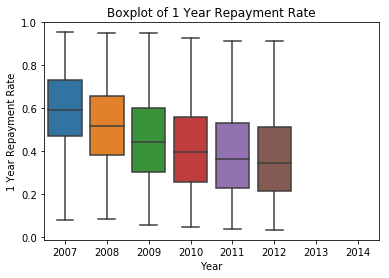

In [111]:
ax1=sns.boxplot(x="Year", y="RPY_1YR_RT", data=sc)
ax1.set(xlabel='Year',ylabel='1 Year Repayment Rate',title='Boxplot of 1 Year Repayment Rate')
plt.show()

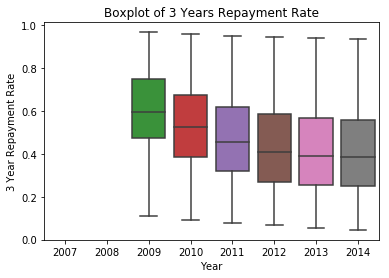

In [112]:
ax3=sns.boxplot(x="Year", y="RPY_3YR_RT", data=sc)
ax3.set(xlabel='Year',ylabel='3 Year Repayment Rate',title='Boxplot of 3 Years Repayment Rate')
plt.show()

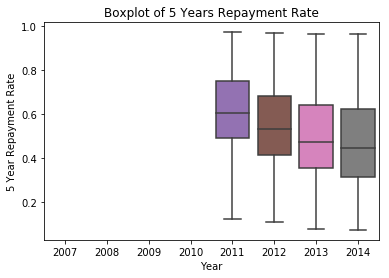

In [113]:
ax5=sns.boxplot(x="Year", y="RPY_5YR_RT", data=sc)
ax5.set(xlabel='Year',ylabel='5 Year Repayment Rate',title='Boxplot of 5 Years Repayment Rate')
plt.show()

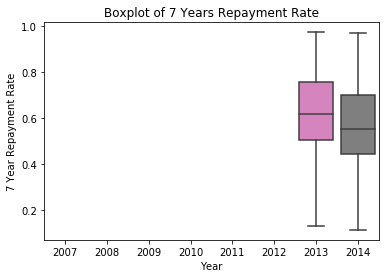

In [114]:
ax7=sns.boxplot(x="Year", y="RPY_7YR_RT", data=sc)
ax7.set(xlabel='Year',ylabel='7 Year Repayment Rate',title='Boxplot of 7 Years Repayment Rate')
plt.show()

combine the above plots in one plot

In [127]:
fig = plt.figure(figsize=(10, 8))
ax1 = plt.subplot(2, 2, 1)
ax1 = sns.boxplot(x="Year", y="RPY_1YR_RT", data=sc)
ax1.set(xlabel='Year',ylabel='1 Year Repayment Rate',title='Boxplot of 1 Year Repayment Rate')
ax3 = plt.subplot(2, 2, 2)
ax3 = sns.boxplot(x="Year", y="RPY_3YR_RT", data=sc)
ax3.set(xlabel='Year',ylabel='3 Year Repayment Rate',title='Boxplot of 3 Year Repayment Rate')
ax5 = plt.subplot(2, 2, 3)
ax5 = sns.boxplot(x="Year", y="RPY_5YR_RT", data=sc)
ax5.set(xlabel='Year',ylabel='5 Year Repayment Rate',title='Boxplot of 5 Years Repayment Rate')
ax7 = plt.subplot(2, 2, 4)
ax7 = sns.boxplot(x="Year", y="RPY_7YR_RT", data=sc)
ax7.set(xlabel='Year',ylabel='7 Year Repayment Rate',title='Boxplot of 7 Years Repayment Rate')
fig.tight_layout()
fig.savefig('repayment.png')

In [34]:
sc_2007=pd.DataFrame(sc[sc['Year']==2007])
sc_2008=pd.DataFrame(sc[sc['Year']==2008])
sc_2009=pd.DataFrame(sc[sc['Year']==2009])
sc_2010=pd.DataFrame(sc[sc['Year']==2010])
sc_2011=pd.DataFrame(sc[sc['Year']==2011])
sc_2012=pd.DataFrame(sc[sc['Year']==2012])
sc_2013=pd.DataFrame(sc[sc['Year']==2013])
sc_2014=pd.DataFrame(sc[sc['Year']==2014])

** Different repayment rates for students who graduated in 2006**

In [ ]:
trace0 = go.Box(y=sc_2007.RPY_1YR_RT,x=sc_2007.Year,name='1 yr repayment',marker=dict(color='salmon'))
trace1 = go.Box(y=sc_2009.RPY_3YR_RT,x=sc_2009.Year,name='3 yr repayment',marker=dict(color='albino'))
trace2 = go.Box(y=sc_2011.RPY_5YR_RT,x=sc_2011.Year,name='5 yr repayment',marker=dict(color='lightskyblue'))
trace3 = go.Box(y=sc_2013.RPY_7YR_RT,x=sc_2013.Year,name='7 yr repayment',marker=dict(color='plum'))

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(yaxis=dict(title='Repayment',zeroline=False),title='Different Years Repayment Rates for Students Who Graduated in 2006 ',boxmode='group')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)

** Different repayment rates for students who graduated in 2007**

In [ ]:
trace0 = go.Box(y=sc_2007.RPY_1YR_RT,x=sc_2008.Year,name='1 yr repayment',marker=dict(color='salmon'))
trace1 = go.Box(y=sc_2010.RPY_3YR_RT,x=sc_2010.Year,name='3 yr repayment',marker=dict(color='albino'))
trace2 = go.Box(y=sc_2012.RPY_5YR_RT,x=sc_2012.Year,name='5 yr repayment',marker=dict(color='lightskyblue'))
trace3 = go.Box(y=sc_2014.RPY_7YR_RT,x=sc_2014.Year,name='7 yr repayment',marker=dict(color='plum'))

data = [trace0, trace1, trace2, trace3]
layout = go.Layout(yaxis=dict(title='Repayment',zeroline=False),title='Different Years Repayment Rates for Students Who Graduated in 2007 ',boxmode='group')
fig = go.Figure(data=data, layout=layout)
py.iplot(fig)
